In [1]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
X = dataset[['CreditScore', 'Age' , 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

geo = pd.get_dummies(dataset['Geography'], drop_first=True)
gender = pd.get_dummies(dataset['Gender'], drop_first=True)

#to save it from dummy variables trap, we always drop one column

X = pd.concat([X, geo, gender], axis=1)

In [3]:
y = dataset[['Exited']]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [6]:
X_train.shape

(8000, 11)

In [7]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.
/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ankit/opt/anaconda3/lib/python3.7/sit

In [8]:
from keras.layers import Dense

In [9]:
#first layer: Hidden layer

#input_dim = 11 (means 11 features in my X variable)

model.add(Dense(units=8, activation = 'relu', input_dim=11))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(units=16, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.get_layer("Dense").input

ValueError: No such layer: Dense

In [13]:
model.add(Dense(units=16, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(units=16, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________


In [16]:
#last layer will always have sigmoid function
#sigmoid function -  works best for binary classification (0 & 1)
from keras.optimizers import Adam

model.add(Dense(units=1, activation='sigmoid', kernel_initializer = 'glorot_uniform'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.optimizers import Adam
model.compile(loss='mean_squared_error',
               optimizer=Adam(learning_rate=0.1))

#learning_rate => hyperparameter

In [21]:
model.fit(X_train, y_train, epochs=20)

ValueError: Invalid argument "activation" passed to K.function with TensorFlow backend

In [23]:
model.history.history
#shows all the loss values

{'loss': [2391.4343666992186,
  2268.76783984375,
  2148.2700258789064,
  2030.7023642578124,
  1929.9900485839844,
  1852.3063701171875,
  1780.6838520507813,
  1710.2176533203126,
  1639.2463095703124,
  1567.4389047851562,
  1495.4384938964845,
  1423.1502263183593,
  1350.8270915527344,
  1278.815343017578,
  1207.08496875,
  1136.4952612304687,
  1069.456772705078,
  1006.6103557128906,
  948.0152003173828,
  894.921980102539,
  846.9348024902343,
  803.6445661621094,
  764.6307743530274,
  728.9661107177734,
  694.9671320800782,
  662.7833911132813,
  632.3411436767578,
  602.9346079101563,
  574.5652073364258,
  547.1941121826172,
  520.4590062255859,
  494.44649743652343,
  469.81832708740234,
  447.6995737304687,
  425.92942407226565,
  404.12063006591796,
  382.3004997558594,
  360.45075646972657,
  338.6446766662598,
  316.7460301208496,
  294.74358502197265,
  272.7504861755371,
  250.81333917236327,
  228.7752593536377,
  206.72501347351073,
  184.63208784484863,
  165.706

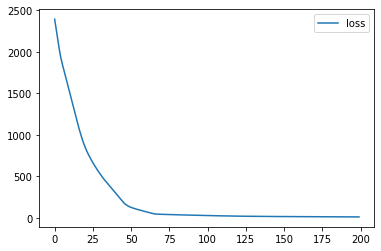

In [24]:
l = pd.DataFrame(model.history.history)
l.plot()